Name: Lam Quang Thinh
<br>Student ID: 300538520

# Assignment 2- Programming

In [1]:
!pip install SimPyClassic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 3.8 MB/s eta 0:00:00


In [2]:
#Import packages
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from SimPy.Simulation import *

## Q1:

a. Write a chisquarevariate(k) function in Python which generates a random variate from a ${x_k}^2$ distribution (chi-square distribution with k degrees of freedom). This is simply the sum of the squares of k independent standard normal random variates.

In [3]:
def chisquarevariate(k):
    """Generate a random variate from a chi-square distribution with k degrees of freedom."""
    sum_of_squares = 0.0
    for i in range(k):
        x = random.gauss(0, 1) # generate a standard normal random variate
        sum_of_squares += x * x # square and sum up the random variates
    return sum_of_squares

b. For each k ∈ {1, 2, 3, 4, 5, 6, 7, 8, 9}, simulate 10000 random variates ${x_k}^2$ k to estimate E(X) and var(X).

In [4]:
def chisquarevariate(k):
    """Generate a random variate from a chi-square distribution with k degrees of freedom."""
    sum_of_squares = 0.0
    for i in range(k):
        x = random.gauss(0, 1) # generate a standard normal random variate
        sum_of_squares += x * x # square and sum up the random variates
    return sum_of_squares

X = []
n = 10000
degree_of_freedom = [1,2,3,4,5,6,7,8,9]
random.seed(123)

for k in degree_of_freedom:
    for i in range(n):
        x = chisquarevariate(k)
        X.append(x)
    E_X = np.mean(X)
    Var_X = np.var(X)
    print("With k = %d, E(X) = %f, Var(X) = %f" %(k, E_X, Var_X))
    

With k = 1, E(X) = 1.014537, Var(X) = 1.996800
With k = 2, E(X) = 1.510681, Var(X) = 3.288222
With k = 3, E(X) = 2.002171, Var(X) = 4.656767
With k = 4, E(X) = 2.503752, Var(X) = 6.267850
With k = 5, E(X) = 2.999389, Var(X) = 7.990191
With k = 6, E(X) = 3.493694, Var(X) = 9.826826
With k = 7, E(X) = 3.993442, Var(X) = 11.937406
With k = 8, E(X) = 4.497962, Var(X) = 14.304893
With k = 9, E(X) = 5.003671, Var(X) = 16.777934


c. Modify your code from part (b) to give a 95% confidence interval for E(X) and a 95% confidence interval for var(X) from 50 replications.

In [5]:
def chisquarevariate(k):
    """Generate a random variate from a chi-square distribution with k degrees of freedom."""
    sum_of_squares = 0.0
    for i in range(k):
        x = random.gauss(0, 1) # generate a standard normal random variate
        sum_of_squares += x * x # square and sum up the random variates
    return sum_of_squares

X = []
n = 10000
degree_of_freedom = [1,2,3,4,5,6,7,8,9]
M = 50
random.seed(123)

for k in degree_of_freedom:
    E_X = np.zeros(M)
    var_X = np.zeros(M)
    for m in range(M):
        for i in range(n):
            x = chisquarevariate(k)
            X.append(x)
        E_X[m]= np.mean(X)
        var_X[m]= np.var(X)
    E_X_ci = [np.quantile(E_X,0.025), np.quantile(E_X, 0.975)]
    Var_X_ci = [np.quantile(var_X,0.025), np.quantile(var_X, 0.975)]
    print("With k = %d, E_X = %f, Var_X = %f, 95%% confidence interval of E(X): [%f, %f], 95%% confidence interval of Var(X): [%f, %f]" % (k,np.mean(E_X), np.mean(var_X), E_X_ci[0], E_X_ci[1], Var_X_ci[0], Var_X_ci[1]))

With k = 1, E_X = 1.000393, Var_X = 2.002004, 95% confidence interval of E(X): [0.997832, 1.011242], 95% confidence interval of Var(X): [1.978731, 2.012548]
With k = 2, E_X = 1.311766, Var_X = 2.817651, 95% confidence interval of E(X): [1.042513, 1.493687], 95% confidence interval of Var(X): [2.131107, 3.232627]
With k = 3, E_X = 1.788795, Var_X = 4.103397, 95% confidence interval of E(X): [1.532138, 1.991714], 95% confidence interval of Var(X): [3.351800, 4.638156]
With k = 4, E_X = 2.277011, Var_X = 5.562647, 95% confidence interval of E(X): [2.028535, 2.487764], 95% confidence interval of Var(X): [4.756051, 6.187109]
With k = 5, E_X = 2.769640, Var_X = 7.204297, 95% confidence interval of E(X): [2.524423, 2.985570], 95% confidence interval of Var(X): [6.319486, 7.922684]
With k = 6, E_X = 3.266717, Var_X = 9.040901, 95% confidence interval of E(X): [3.022246, 3.487654], 95% confidence interval of Var(X): [8.069483, 9.859759]
With k = 7, E_X = 3.766003, Var_X = 11.057197, 95% confide

d. The 95% Confidence Intervals of part (c) contain the exact value of E(X) and Var(X)

## Q2

The number of customers coming to a shop in a day follows a Poisson distribution with a mean of 22.

a. The probability of 28 customers coming to that shop in a day.

In [6]:
mu = 22
k = 28
poisson.pmf(k, mu)

0.03541731538896103

b. Write Python code to answer the previous question through simulation by generating 10000 random variates from a Poisson distribution. Plot the frequency of the number of customers in this simulation. Use random seed = 123 for this question.

Probability of 28 customers going to the shop a day: 0.0424


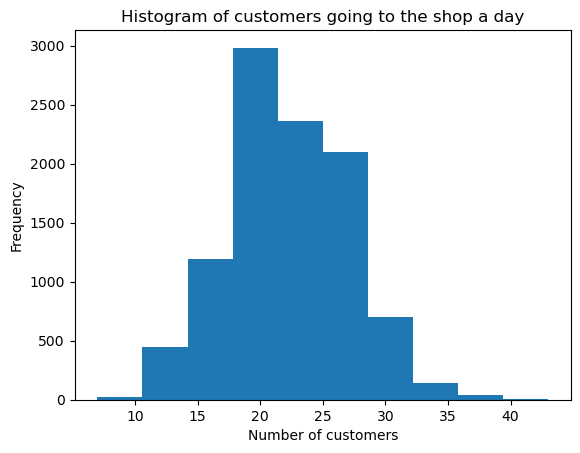

In [7]:
mu = 22
n = 10000

random.seed(123)
customers = poisson.rvs(mu, size = n)

prob = len(customers[customers == 28]) / n

print("Probability of 28 customers going to the shop a day:", prob)

plt.hist(customers)
plt.xlabel("Number of customers")
plt.ylabel("Frequency")
plt.title("Histogram of customers going to the shop a day")
plt.show()

## Q3:

Kathy enters the museum at time 0
<br> Three displays: 0, 1, 2. See two of them
<br> First go to display 0
<br> Then go to display 1, p1= 0.4, display 2: p2 = 1 - p1
<br> displayTime = [4.5, 5.5, 7.5]
<br> She says "Look number i" when she goes to the display i
<br> random seed of 123

In [8]:
class Museum(Process):
    def visit(self):
        p1 = 0.4
        print("At time",now(), ",", self.name, "looks number 0")
        yield hold, self, displayTime[0]
        display = [1,2]
        # Choose the display with corresponding probabilities
        random.choices(display, weights =(p1, 1-p1), k =1)
        print("At time",now(), ",", self.name, "looks number %d" % display[0])
        yield hold, self, displayTime[display[0]]
        print("At time", now(), ",", self.name, "exits the museum")

random.seed(123)
initialize()
displayTime = [4.5, 5.5, 7.5]
kathy = Museum("Kathy")
activate(kathy, kathy.visit(), now())
simulate(until = 100)        

At time 0 , Kathy looks number 0
At time 4.5 , Kathy looks number 1
At time 10.0 , Kathy exits the museum


'SimPy: No more events at time 10.0'